# German credit data

In [2]:
import pandas as pd

german = pd.read_csv("")
german

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,24,2,3,1987,1,3,2,3,...,4,1,21,3,1,1,2,2,1,1
996,0,1,24,2,0,2303,1,5,4,3,...,1,1,45,3,2,1,3,1,1,1
997,0,4,21,4,0,12680,5,5,4,3,...,4,4,30,3,3,1,4,1,2,1
998,0,2,12,2,3,6468,5,1,2,3,...,1,4,52,3,2,1,4,1,2,1


In [3]:
german.shape

(1000, 21)

In [4]:
german.columns # 필요한 column만 가져와서 분석해보자.

Index(['Creditability', 'Account Balance', 'Duration of Credit (month)',
       'Payment Status of Previous Credit', 'Purpose', 'Credit Amount',
       'Value Savings/Stocks', 'Length of current employment',
       'Instalment per cent', 'Sex & Marital Status', 'Guarantors',
       'Duration in Current address', 'Most valuable available asset',
       'Age (years)', 'Concurrent Credits', 'Type of apartment',
       'No of Credits at this Bank', 'Occupation', 'No of dependents',
       'Telephone', 'Foreign Worker'],
      dtype='object')

In [5]:
new_german = german[['Creditability', 'Duration of Credit (month)', 'Purpose', 'Credit Amount']]
new_german

# Creditability : 신용상태 (1: 우량, 0: 불량)
# Duration of Creadit : 계좌존속기간 (달)
# Purpose : 대출목적 (0:새차구입, 1:중고차구입, ..., )
# Credit Amout: 대출액

,Creditability,Duration of Credit (month),Purpose,Credit Amount
0,1,18,2,1049
1,1,9,0,2799
2,1,12,9,841
3,1,12,0,2122
4,1,12,0,2171
...,...,...,...,...
995,0,24,3,1987
996,0,24,0,2303
997,0,21,0,12680
998,0,12,3,6468


In [6]:
new_german.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Creditability               1000 non-null   int64
 1   Duration of Credit (month)  1000 non-null   int64
 2   Purpose                     1000 non-null   int64
 3   Credit Amount               1000 non-null   int64
dtypes: int64(4)
memory usage: 31.4 KB


In [7]:
new_german.dtypes

Creditability                 int64
Duration of Credit (month)    int64
Purpose                       int64
Credit Amount                 int64
dtype: object

In [8]:
new_german.min()

Creditability                   0
Duration of Credit (month)      4
Purpose                         0
Credit Amount                 250
dtype: int64

In [9]:
new_german.max()

Creditability                     1
Duration of Credit (month)       72
Purpose                          10
Credit Amount                 18424
dtype: int64

In [11]:
new_german.describe

<bound method NDFrame.describe of      Creditability  Duration of Credit (month)  Purpose  Credit Amount
0                1                          18        2           1049
1                1                           9        0           2799
2                1                          12        9            841
3                1                          12        0           2122
4                1                          12        0           2171
..             ...                         ...      ...            ...
995              0                          24        3           1987
996              0                          24        0           2303
997              0                          21        0          12680
998              0                          12        3           6468
999              0                          30        2           6350

[1000 rows x 4 columns]>

In [13]:
# 상관게수
# 변수들간의 상관계수 -1~1사이. 1에 가까울 수록 서로 상관이 있는 데이터. 0에 가까우면 관계가 없다고 볼 수 있음.

new_german = german[['Duration of Credit (month)', 'Credit Amount', 'Age (years)']]
new_german

new_german.corr()

,Duration of Credit (month),Credit Amount,Age (years)
Duration of Credit (month),1.000000,0.624988,-0.037550
Credit Amount,0.624988,1.000000,0.032273
Age (years),-0.037550,0.032273,1.000000


## 상관관계 시각화
- pairplot
- heatmap

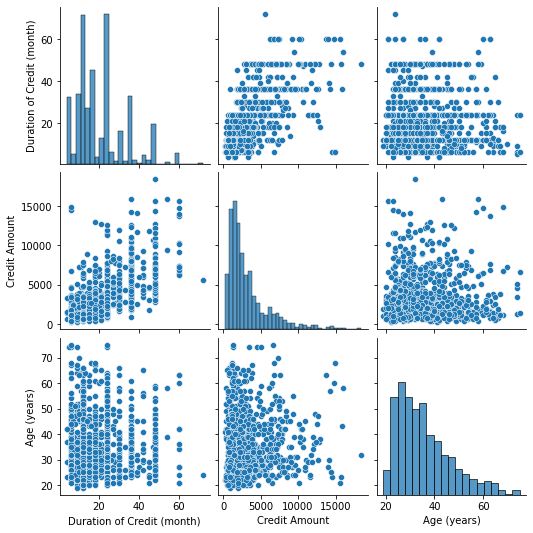

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(new_german)

<AxesSubplot:>

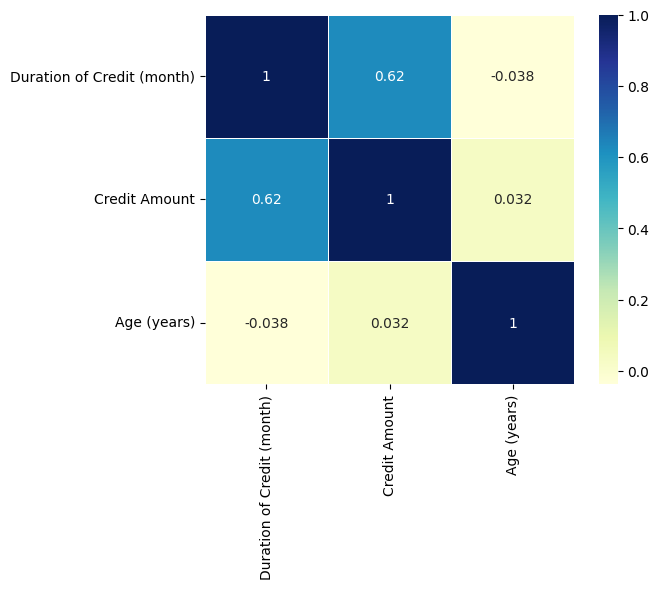

In [15]:
sns.heatmap(new_german.corr(), annot=True, cmap='YlGnBu', lw=0.5, square=True)
# corr() => 상관분석
# 색깔이 진할 수록 상관관계가 높다고 볼 수 있다.

## boxplot

<AxesSubplot:>

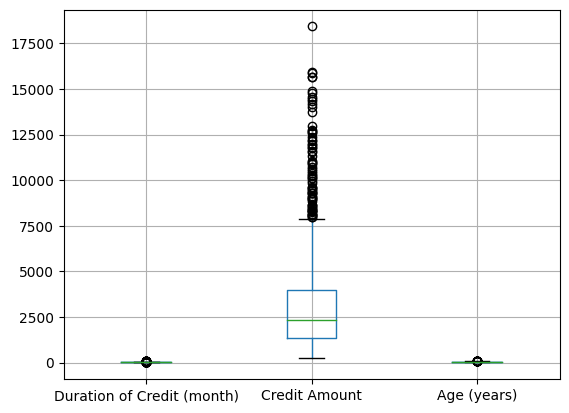

In [17]:
new_german.boxplot()

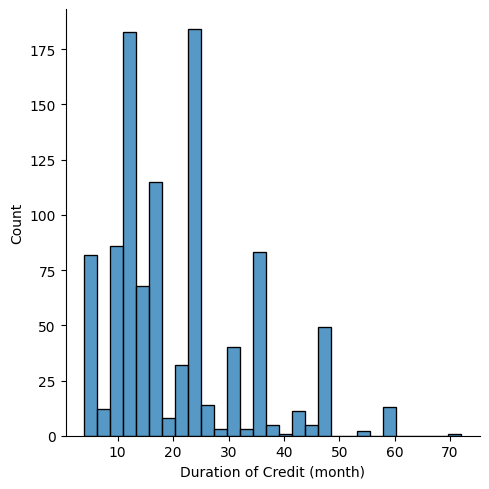

In [18]:
sns.displot(new_german['Duration of Credit (month)'])

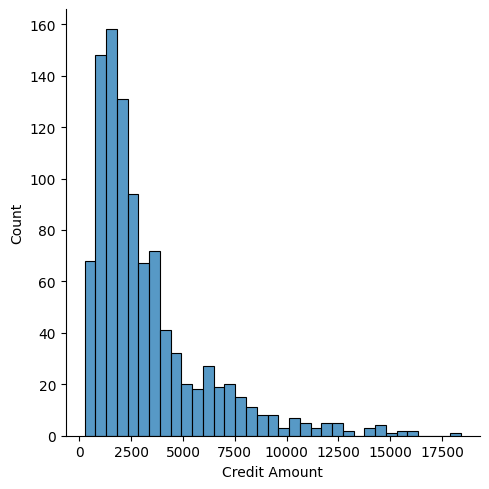

In [19]:
sns.displot(new_german['Credit Amount'])

# 데이터가 한쪽으로 몰려있는 것을 볼 수 있습니다. 분석하기에 좋은 데이터가 아니라는 뜻.

<AxesSubplot:xlabel='Age (years)', ylabel='Credit Amount'>

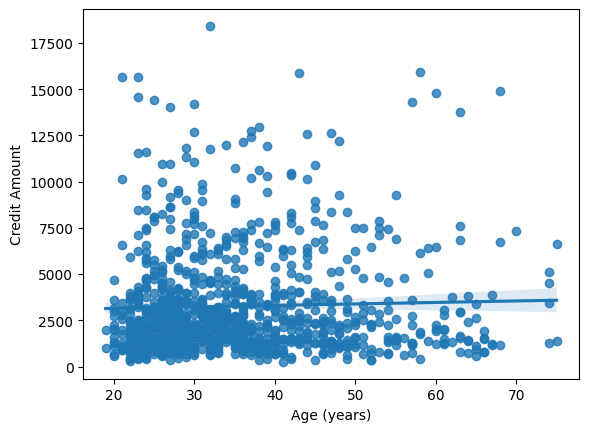

In [20]:
sns.regplot(x='Age (years)', y='Credit Amount', data=new_german) 
# regplot: scatterplot(산점도, 서로 다른 2개의 연속형(수치형) 변수 사이에 점을 찍는 그래프)
# scatterplot을 많이 사용하는데, regplot을 사용하면 회귀선까지 볼 수 있다.
# 회귀를 보는 이유는? 독립변수 X와 종속변수 y 두 변수 간의 상관관계 보기 위해.

# 내가 분석하고 싶은 목표 데이터를 Y에 놓아야한다.

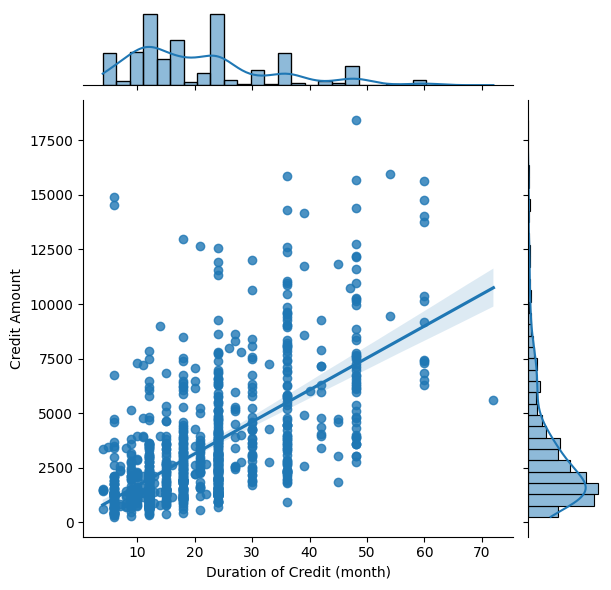

In [21]:
sns.jointplot(x='Duration of Credit (month)', y='Credit Amount', data=new_german, kind='reg')

# jointplot은 x,y축의 displot도 함께 보여준다.

<AxesSubplot:xlabel='Age (years)', ylabel='Credit Amount'>

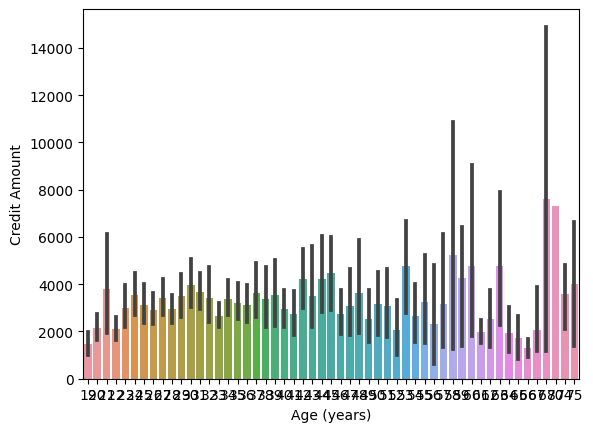

In [22]:
sns.barplot(x='Age (years)', y='Credit Amount', data=new_german)

<AxesSubplot:xlabel='Age (years)', ylabel='count'>

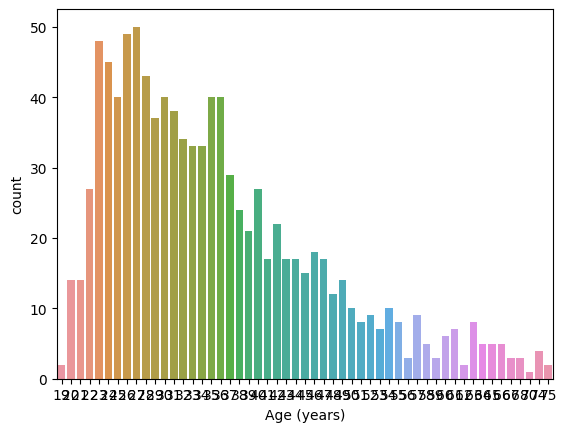

In [24]:
sns.countplot(x='Age (years)', data=new_german)

<AxesSubplot:xlabel='Age (years)', ylabel='Credit Amount'>

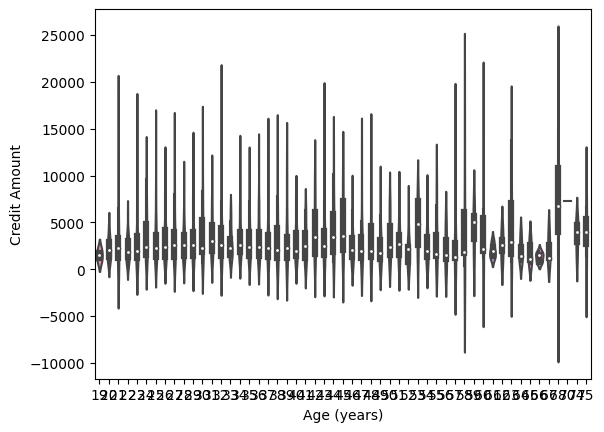

In [25]:
sns.violinplot(x='Age (years)', y='Credit Amount', data=new_german)

# 가운데 흰색이 중앙값
# 바이올린 모양이어서 violinplot 이라고 부른다.